In [ ]:
import numpy as np
import torch
from torch import optim, nn                         # These are specific submodules which contain useful functions. optim has optimizers like SGD, Adam
import torch.nn.functional as F                     # nn has several Neural Network related functions
from torch.utils.data import TensorDataset, DataLoader     # torch.nn.functional is often used as F or Fnn. It contains several useful implementations like F.linear, F.relu etc
# np.random.seed(42)
# torch.manual_seed(42)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

In [ ]:
a = np.random.randn(1, 4)
b = np.random.randn(1, 4)

print((a*b).shape)
print(np.multiply(a, b).shape)

1/4 * np.sum(a*b) == np.mean(a*b)

(1, 4)
(1, 4)


True

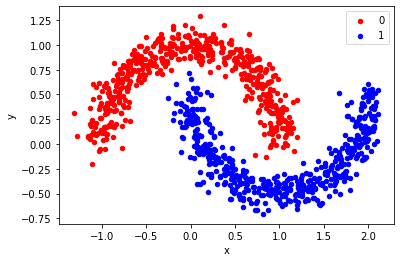

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from pandas import DataFrame

# Generate a 2D classification dataset
X, Y = make_moons(n_samples=1000, noise=0.1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [ ]:
n_samples, n_features = X.shape
n_y_samples, n_targets = Y.reshape(-1, 1).shape
assert n_samples == n_y_samples

print(X.shape, n_samples, n_features)
print(Y.shape, n_targets)

(1000, 2) 1000 2
(1000,) 1


The above is a dataset for classification tasks. We'll try to build a neural network which can classify the above. Until now, you've been using NumPy for most of your mathematical purposes but here, we'll introduce you to PyTorch. PyTorch is a very powerful module in Python which is one of the best frameworks for working in Deep Learning. It has a lot of features which make it ideal for a beginner to start learning DL.

In [ ]:
# In torch, we use Tensors in place of numpy arrays. They're simply another data structure.
a = np.array([1, 2, 3, 4])
b = torch.Tensor([1, 2, 3, 4])

# Note that even though the element at index 1 in b is 2, it's still considered a torch.Tensor
print(a, type(a), a[1], type(a[1]))
print(b, type(b), b[1], type(b[1]))

[1 2 3 4] <class 'numpy.ndarray'> 2 <class 'numpy.int64'>
tensor([1., 2., 3., 4.]) <class 'torch.Tensor'> tensor(2.) <class 'torch.Tensor'>


In [ ]:
# If you want to define an array with multiple dimensions
a = np.random.random(size=(4, 3, 2))
print(a, a.shape, type(a.shape)) # shape returns the dimensions of the numpy array as a tuple

print("\n")
# If you want to define a Tensor with multiple dimensions
b = torch.rand(4, 3, 2)
print(b, b.shape, type(b.shape)) # note that here, b.shape will return an object of the type torch.Size

[[[0.29703686 0.26901561]
  [0.78780652 0.01313242]
  [0.09857081 0.70939029]]

 [[0.13801167 0.86552339]
  [0.0614875  0.85175928]
  [0.38419291 0.29386582]]

 [[0.51391087 0.87302256]
  [0.54167334 0.05573886]
  [0.20561234 0.5712388 ]]

 [[0.81605582 0.97923713]
  [0.98500879 0.13715894]
  [0.19172904 0.14421212]]] (4, 3, 2) <class 'tuple'>


tensor([[[0.9063, 0.1881],
         [0.1406, 0.0015],
         [0.5599, 0.7493]],

        [[0.4059, 0.2769],
         [0.3190, 0.0712],
         [0.9406, 0.2313]],

        [[0.0598, 0.8671],
         [0.0946, 0.7463],
         [0.9439, 0.9814]],

        [[0.4007, 0.7386],
         [0.6029, 0.2874],
         [0.8886, 0.0273]]]) torch.Size([4, 3, 2]) <class 'torch.Size'>


In [ ]:
# Sometimes you'll need to convert numpy arrays to Tensors
a = np.random.random(size=(4, 3, 2))
print(a, "\n")

# We can use either of the following methods of which the latter is generally preferred
b = torch.Tensor(a)     # This directly converts a numpy array to a torch Tensor
print(b, "\n")
c = torch.from_numpy(a) # This creates a copy of the numpy array which it converts to a torch Tensor
                        # It explicitly converts the type of the data within from np.type to torch.type
print(c)

# There's also d = torch.as_tensor(a) which is also used and can convert types 
# like collections.deque (yet another kind of data structure) into a torch tensor

[[[0.49730777 0.82859297]
  [0.86356609 0.7260386 ]
  [0.56015864 0.22481779]]

 [[0.62940796 0.35379651]
  [0.85713259 0.0851586 ]
  [0.57773272 0.64290853]]

 [[0.62315844 0.31813192]
  [0.90448385 0.0681786 ]
  [0.11289664 0.94778469]]

 [[0.17989838 0.73024857]
  [0.21121921 0.34142641]
  [0.76342142 0.90949817]]] 

tensor([[[0.4973, 0.8286],
         [0.8636, 0.7260],
         [0.5602, 0.2248]],

        [[0.6294, 0.3538],
         [0.8571, 0.0852],
         [0.5777, 0.6429]],

        [[0.6232, 0.3181],
         [0.9045, 0.0682],
         [0.1129, 0.9478]],

        [[0.1799, 0.7302],
         [0.2112, 0.3414],
         [0.7634, 0.9095]]]) 

tensor([[[0.4973, 0.8286],
         [0.8636, 0.7260],
         [0.5602, 0.2248]],

        [[0.6294, 0.3538],
         [0.8571, 0.0852],
         [0.5777, 0.6429]],

        [[0.6232, 0.3181],
         [0.9045, 0.0682],
         [0.1129, 0.9478]],

        [[0.1799, 0.7302],
         [0.2112, 0.3414],
         [0.7634, 0.9095]]], dtype=torch.

By now, I guess you would've already read a little about Gradient Descent and understood Logistic Regression well. This next step will be slightly more complex. We'll be combining Linear layers on top of each other, except there will be activation layers in the middle.

This basically means that we'll take one equation $y = W_1 X + b_1$ and another equation $y = W_2 X + b_2$ but if we just stack these one on top of other, we'll just get another linear equation (substitute y from first equation in the second)

Now what if we put some non-linear equation in the middle of these two equations? Say $y = g(x)$. One example of a non-linear function would be the sigmoid function as you would know from logistic regression. Another interesting non-linear function is the ReLU function. The Rectified Linear Unit is a very simple yet powerful activation function. It has been hypothesised that the signals our body's neurons send are the closest to ReLUs. For a more detailed list and analysis of pros and cons, check out https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

The ReLU is simply the function \
$y = x$ if $x > 0$ \
$y = 0$ if $x < 0$

We'll be using the ReLU to build our neural network in this example. Since this is a classifier, our last layer should be either a sigmoid (for two classes) or a softmax (for multiple classes). Here we'll use a sigmoid.

Note that I'm not going to show any proofs or mathematical working for the following. You would learn best if you did some of the math yourself by calculating the individual gradients etc.

Also, from here on, we'll do the math in Torch. Note that this kind of coding is not generally done in torch and we use other stuff for that but since we wanted to give you a solid understanding of Torch usage, we used Torch here instead of numpy.

In [ ]:
def relu(z):
    return torch.max(torch.zeros_like(z), z)           # If you don't understand what a function does, go through its documentation by googling it
                                                       # Otherwise, the math is something you can do yourself
def relu_backward(z, da):
    dz = torch.clone(da)
    dz[z < 0] = 0
    return dz

def sigmoid(z):
    return 1/(1+torch.exp(-z))

def sigmoid_backward(z, da):                            # The da term signifies the gradient of a w.r.t. to the variable that it was used to compute
    return da * sigmoid(z) * sigmoid(1-z)

In [ ]:
def crossentropy(yp, yl):       # yp = predicted values, yl = actual labels of values
    m = n_targets               # Number of targets = 10 in this case (number between 1 and 10)
    yl = yl.unsqueeze(1)
    loss = -1/n_targets * (torch.mul(yl, torch.log(yp)) + torch.mul(1-yl, torch.log(1-yp)))
    assert not torch.any(torch.isnan(loss))     # Checks if any element of loss has a nan value. Only passes if there is no nan value.
    return torch.sum(loss)

def crossentropy_backward(yp, yl):
    m = n_targets
    yl = yl.unsqueeze(1)
    loss_backward = -1/n_targets * (torch.div(yl, yp) - torch.div(1-yl, 1-yp))
    assert not torch.any(torch.isnan(loss_backward))
    return loss_backward

def mseloss(yp, yl):
    yl = yl.unsqueeze(1)
    loss = (yp-yl) ** 2
    return torch.sum(loss)

def mseloss_backward(yp, yl):
    yl = yl.unsqueeze(1)
    return 2*(yp-yl)

In [ ]:
def calc_accuracy(a, y):                            # Helper function to calculate accuracy
    a = torch.max(a, dim=1)[1]
    assert not torch.any(torch.isnan(a))
    return torch.mean((a == y).float()).item()

In [ ]:
n_samples = X.shape[0]
n_features = X.shape[1]
n_targets = len(set(Y))
n_hidden = [8, 8]

architecture = [n_features] + list(n_hidden) + [n_targets]          # Defining the architecture of our neural network. In this case, we have 1 input layer of 2 neurons,
                                                                    # 1 hidden layer of 32 neurons each and 1 output layer of 2 neurons. 
                                                                    # There's a limit to how well this works as the input and output layers are pretty small. 

In [ ]:
def init_params():              # Helper function to initialise weights
    params = {}
    for j in range(1, len(architecture)):
        params["W" + str(j)] = torch.randn((architecture[j-1], architecture[j])) * 1e-3
        params["b" + str(j)] = torch.randn((1, architecture[j])) * 1e-3
    return params

In [ ]:
def batch_loader(batch_size):             # Helper function that can be used to load batches of x, y for Stochastic Gradient Descent
    for _ in range(int(n_samples / batch_size)):            # Not used here because it gives unstable results
        batch_indices = torch.randint(0, n_samples, (batch_size,))

        x = torch.FloatTensor(X[batch_indices]).view(-1, n_features)
        y = torch.FloatTensor(Y[batch_indices])

        yield x, y

In [ ]:
batch_size = 32

train_dataset = TensorDataset(torch.FloatTensor(X), torch.LongTensor(Y))
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)       # We use this for loading stable batches for gradient descent. 

In [ ]:
num_epochs = 100
learning_rate = 0.1

params = {}
memory = {}
loss_history = []
accuracy_history = []
params = init_params()

import time                 # Module that helps us time the runtime of code

start = time.time()

for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    epoch_accuracy = 0

    for x, y in train_loader:
        x = x.view(-1, n_features)
        y = y.view(-1).float()

        # Forward propogation:
        memory["a0"] = x
        for j in range(1, len(architecture)):
            W, b = params["W" + str(j)], params["b" + str(j)]
            a_prev = memory["a" + str(j-1)]

            z = a_prev.matmul(W) + b            # torch.dot can be used only for 1D arrays.(Even in numpy, np.matmul is preferable to np.dot, read up the differences if you want)
            memory["z" + str(j)] = z            # This can be written as memory["z" + str(j)] = memory["a" + str(j-1)].matmul(params["W" + str(j)]) + params["b" + str(j)]
                                                # For example, for j = 1, z1 = a0 . W1 + b1
            if j < len(architecture) - 1:       # In case you want to try changing all sigmoids before the final layer to ReLUs. Doesn't work in this case cos of too few inputs.
                a = sigmoid(z)
            else:
                a = sigmoid(z)
            memory["a" + str(j)] = a            # In case that helps you better understand it that way

        loss = crossentropy(a, y).item()                # .item() Converts the loss value from a 0-D Tensor to a simple float
        accuracy = calc_accuracy(a, y)

        epoch_loss += loss / n_samples * batch_size
        epoch_accuracy += accuracy / n_samples * batch_size

        # Backward propogation:
        da = None
        for j in reversed(range(1, len(architecture))):
            W, b = params["W" + str(j)], params["b" + str(j)]
            z, a = memory["z" + str(j)], memory["a" + str(j)]
            a_prev = memory["a" + str(j-1)]

            if da is None:
                da = crossentropy_backward(a, y)                          # This is the gradient of a w.r.t. loss. Means dL/da.
            else:
                da = da_prev
            assert da.shape == a.shape
            if j < len(architecture) - 1:
                dz = sigmoid_backward(z, da)
            else:
                dz = sigmoid_backward(z, da)
            assert dz.shape == z.shape                                    # Put these in just in case we don't compute tensors with wrong dimensions
            dW = a_prev.T.matmul(dz)
            assert dW.shape == W.shape
            db = 1/batch_size * torch.sum(dz, dim=0, keepdim=True)        # If you don't understand what this means, find out from the documentation of torch.sum()
            assert db.shape == b.shape
            da_prev = dz.matmul(W.T)
            assert da_prev.shape == a_prev.shape

            # Now that we have the gradients, let's update the params
            params["W" + str(j)] -= learning_rate * dW
            params["b" + str(j)] -= learning_rate * db
        
    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_accuracy)

    if epoch % 5 == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, round(epoch_loss, 3), round(epoch_accuracy*100, 3)))

end = time.time()

print("\n\nTime taken = {} s".format(end-start))

Epoch: 5, Loss: 14.268, Accuracy: 85.6
Epoch: 10, Loss: 10.1, Accuracy: 89.2
Epoch: 15, Loss: 9.631, Accuracy: 89.3
Epoch: 20, Loss: 9.366, Accuracy: 90.0
Epoch: 25, Loss: 9.257, Accuracy: 90.0
Epoch: 30, Loss: 9.333, Accuracy: 89.8
Epoch: 35, Loss: 9.271, Accuracy: 90.2
Epoch: 40, Loss: 9.314, Accuracy: 89.0
Epoch: 45, Loss: 9.141, Accuracy: 89.4
Epoch: 50, Loss: 9.01, Accuracy: 87.1
Epoch: 55, Loss: 9.151, Accuracy: 80.9
Epoch: 60, Loss: 9.198, Accuracy: 75.2
Epoch: 65, Loss: 9.06, Accuracy: 66.2
Epoch: 70, Loss: 9.269, Accuracy: 66.5
Epoch: 75, Loss: 9.164, Accuracy: 65.3
Epoch: 80, Loss: 9.301, Accuracy: 63.5
Epoch: 85, Loss: 9.317, Accuracy: 58.8
Epoch: 90, Loss: 8.974, Accuracy: 55.2
Epoch: 95, Loss: 8.986, Accuracy: 55.1
Epoch: 100, Loss: 9.12, Accuracy: 54.8


Time taken = 3.747494697570801 s


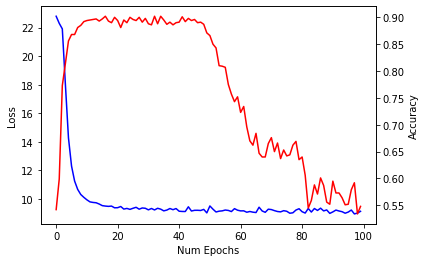

In [ ]:
fig, ax = plt.subplots()

ax.plot(loss_history, color="blue")
ax.set_xlabel("Num Epochs")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
ax2.plot(accuracy_history, color="red")
ax2.set_ylabel("Accuracy")

plt.show()

There's a lot of stuff to understand over here for this to make sense. First of all, note that we shouldn't really be judging our model based on the accuracy it gives. When we define our loss function, we tell our model that we want it to minimise the loss function, hence accuracy is immaterial to the model. Also note that this is not a perfect foolproof implementation and there are some things that need to be taken care of. Also, it's often a good idea to have these models terminate when the results start to stagnate (loss becomes constant and accuracy seems reasonable and constant too).

This is stochastic gradient descent, so it DOES NOT mean that the loss function will always converge perfectly (if every epoch reduces the loss a little bit). And you will notice that since we use the crossentropy loss, if our `a` terms become close to 0, `torch.log(y_hat)` will return `nan` values. This will make our loss value `nan`. If you encounter this, try changing the hyperparameters and tune accordingly.

However, you may think of making your accuracy your loss function, however that's not possible because the accuracy function is not differentiable and you would have to find methods other than gradient descent to solve it and then it wouldn't really need a neural network anymore. 

The performance of the network is not as good as the following approach. See if you can figure out what the reasons may be :P

Now, let's do the same thing in the way we would actually use Pytorch. Pytorch by default keeps track of every operation that's being performed on each variable so we don't need memory holders like `memory` and don't have to explicitly calculate gradients for everything. When we go ahead to using more complex architectures, you'll find that this is an extremely convinient feature.

In [ ]:
# Of course, all this is pointless because Pytorch achieves the same in the following

class NN(nn.Module):                                                    # This is a class for Neural Networks. It can be used to instantiate new neural network objects
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NN, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)                     # This simply says that there is a Linear layer. (the weights are initialised automatically)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))                                  # Performs the sigmoid operation after applying a linear operation
        x = torch.sigmoid(self.fc2(x))
        return x


model = NN(n_features, n_hidden[0], n_targets)
loss_history = []
accuracy_history = []

batch_size = 32
optimizer = optim.SGD(model.parameters(), lr=0.1)                       # In DL, we use optimizers which take in the relevant parameters (in this case, our linear layers)
num_epochs = 100                                                        # and we train them later on

train_dataset = TensorDataset(torch.FloatTensor(X), torch.LongTensor(Y))
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

start = time.time()

for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for datapoints, labels in train_loader:
        x = datapoints.view(-1, n_features)
        y = labels.view(-1)                             # Converts y to a Long tensor (long integer type)
        
        z = model(x)                                    # Applies all operations in Neural Network to x
        loss = F.cross_entropy(z, y)                    # Applies cross entropy loss function
        optimizer.zero_grad()                           # All gradients are reset to 0
        loss.backward()                                 # Gradients of all variables used to calculate the loss variable are calculated (using a computation graph)
        optimizer.step()                                # Stochastic gradient descent is applied to all the trainable variables (our linear layers)

        accuracy = calc_accuracy(z, y)

        epoch_loss += loss.item() / n_samples * batch_size
        epoch_accuracy += accuracy / n_samples * batch_size

    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_accuracy)

    if epoch % 5 == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, round(epoch_loss, 3), round(epoch_accuracy*100, 3)))

end = time.time()

print("\n\nTime taken = {} s".format(end-start))

Epoch: 0, Loss: 0.724, Accuracy: 50.9
Epoch: 5, Loss: 0.692, Accuracy: 66.3
Epoch: 10, Loss: 0.664, Accuracy: 74.8
Epoch: 15, Loss: 0.631, Accuracy: 76.6
Epoch: 20, Loss: 0.596, Accuracy: 79.3
Epoch: 25, Loss: 0.565, Accuracy: 80.8
Epoch: 30, Loss: 0.543, Accuracy: 81.9
Epoch: 35, Loss: 0.528, Accuracy: 82.4
Epoch: 40, Loss: 0.515, Accuracy: 83.3
Epoch: 45, Loss: 0.503, Accuracy: 84.2
Epoch: 50, Loss: 0.496, Accuracy: 85.3
Epoch: 55, Loss: 0.49, Accuracy: 85.7
Epoch: 60, Loss: 0.485, Accuracy: 86.1
Epoch: 65, Loss: 0.485, Accuracy: 85.8
Epoch: 70, Loss: 0.472, Accuracy: 88.0
Epoch: 75, Loss: 0.471, Accuracy: 87.5
Epoch: 80, Loss: 0.467, Accuracy: 87.9
Epoch: 85, Loss: 0.464, Accuracy: 88.0
Epoch: 90, Loss: 0.46, Accuracy: 88.5
Epoch: 95, Loss: 0.457, Accuracy: 88.8


Time taken = 3.029741048812866 s


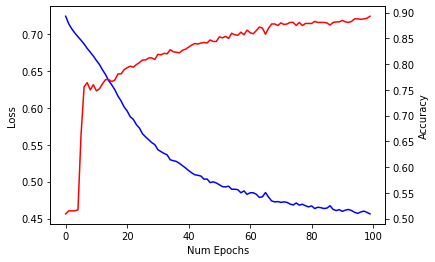

In [ ]:
fig, ax = plt.subplots()

ax.plot(loss_history, color="blue")
ax.set_xlabel("Num Epochs")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
ax2.plot(accuracy_history, color="red")
ax2.set_ylabel("Accuracy")

plt.show()

This is still a pretty simple way to use Pytorch. You must have noticed that the latter implementation is slightly faster (because it is a highly optimized library) and that it converges much better and much more surely. It takes care of several other problems too such as the `nan` loss problem with its implementations. Hence the __much__ smoother curves.

We wouldn't generally apply Deep Learning on such small datasets for doing tiny classification tasks that we can do with other ML algorithms and get a higher accuracy for. DL is much better applied to larger datasets.

In [ ]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [ ]:
# If you've watched the 3B1B Neural Network's video, you'll recognise the following dataset

transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="./", train=True, transform=transform, download=True)       # Downloads the MNIST dataset into 2 parts: train and test
test_dataset = datasets.MNIST(root="./", train=False, transform=transform)                      # We train on 60,000 images first, then we test our model on 10,000 unseen images

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)                   # This is like our batch_loader function except it loads 60000/batch_size
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)                    # no. of batches ()

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
image, label = train_dataset[0]         # This will load the image and it's respective label onto the variables image, label

In [ ]:
print(image)
print(image.shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

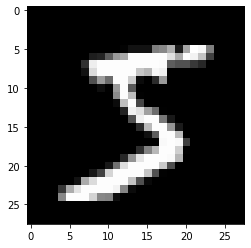

In [ ]:
plt.imshow(transforms.ToPILImage()(image), cmap="gray")
# The coloring may fool you, but as you can see above, the image variable is just a collection of different pixel values.
# There's only one color channel. 0.0000 represents the pure black. 1.0000 represents pure white.
# Everything in between is some proportion of white and black (basically gray)

In [ ]:
label       # Represents the label or the true value represented by the above image

5

In [ ]:
# The neural network we have built earlier is called a feedforward neural network
# All the inputs pass through fully-connected layers (each neuron in one layer is connected to each neuron in the next) and send information only in one direction
# Hence, we have the linear layers called fc1 and fc2 (fully connected layers)

class FeedforwardNeuralNetwork(nn.Module):          # nn.Module is a base class for all neural networks to inherit from
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(FeedforwardNeuralNetwork, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):                           # The forward function passes variables through the model. When we call model(x), it actually runs model.forward(x)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))                  # We use a softmax for classification for the last layer. We have 10 different labels in this case

        return x

In [ ]:
input_dim = 1 * 28 * 28         # The shape of the image. The image here is a 28 x 28 image with 1 color channel. We'll flatten the image to a single linear tensor
hidden_dim = 32                # 1 hidden layers with 32 neurons
output_dim = 10                 # Ten numbers from 0-9

model = FeedforwardNeuralNetwork(input_dim, hidden_dim, output_dim)

optimizer = optim.Adam(model.parameters(), lr=0.01)          # Find out about the Adam optimizer if you want. It works with the same principles as SGD but is more complex

In [ ]:
# Now let's train! This is going to take some time (around 5)

num_epochs = 25
loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for i, (images, labels) in enumerate(train_loader):     # Loads images batchwise. If you want, you can see the shapes of the images, labels variables
        x = images.view(-1, input_dim)
        y = labels.view(-1)

        z = model(x)
        loss = F.cross_entropy(z, y)
        accuracy = calc_accuracy(z, y)

        optimizer.zero_grad()           # If you don't reset this for every batch, it'll add to the gradients of the previous batch
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() / 60000 * batch_size
        epoch_accuracy += accuracy / 60000 * batch_size
    
    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_accuracy)

    if epoch % 5 == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, round(epoch_loss, 3), round(100*epoch_accuracy, 3)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Epoch: 0, Loss: 1.685, Accuracy: 77.953
Epoch: 5, Loss: 1.513, Accuracy: 94.923
Epoch: 10, Loss: 1.509, Accuracy: 95.325
Epoch: 15, Loss: 1.509, Accuracy: 95.307
Epoch: 20, Loss: 1.507, Accuracy: 95.563


In [ ]:
# Now let's test the same model on the test dataset. 
# Remember that at the end, we don't want our model to learn our training set perfectly but also to be able to generalise to unseen datasets.

num_epochs = 5
avg_loss = 0
avg_accuracy = 0

for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for images, labels in test_loader:
        x = images.view(-1, input_dim)
        y = labels.view(-1)

        z = model(x)
        loss = F.cross_entropy(z, y)
        accuracy = calc_accuracy(z, y)

        epoch_loss += loss.item() / 10000 * batch_size
        epoch_accuracy += accuracy / 10000 * batch_size

    avg_loss += epoch_loss / num_epochs
    avg_accuracy += epoch_accuracy / num_epochs

print("Number of Epochs tested: {}, Average loss: {}, Average Accuracy: {}".format(num_epochs, round(avg_loss, 3), round(100*avg_accuracy, 3)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Number of Epochs tested: 5, Average loss: 1.515, Average Accuracy: 95.78


3
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


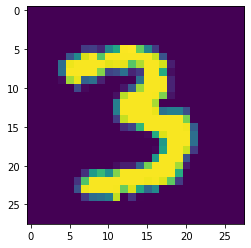

In [ ]:
# If you want to see what actually happened: 

image, label = test_dataset[500]

plt.imshow(transforms.ToPILImage()(image))
print(label)
print(torch.argmax(model(image.view(-1, 28*28))).item())